In [277]:
import scipy.misc
import tensorflow as tf
import numpy as np
import time
import sys
# from numba import jit
import os
#from utils import imread
from astropy.io import fits
from astropy import wcs
from astropy import coordinates
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import astropy.stats as apstats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.gridspec as gridspec
import time
import scipy.stats
import scipy.optimize
import photutils as pu
from matplotlib import gridspec
# import seaborn as sns
from scipy import stats as stats
import random
import pandas as pd
import matplotlib.colors as colors
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground
import scipy as sc
import matplotlib
from scipy.optimize import curve_fit
import matplotlib.pyplot as mplplot
from matplotlib.colorbar import Colorbar

In [24]:
path = '/STEM/data/project/users/lrbl2/fake_test_fake_jan_25/' #GalaxyGAN/Herschel-JCMT/Herschel-JCMT/interp_combined_real/'
test_csv = pd.read_csv("/STEM/data/project/users/lrbl2/training_dec_2/test.csv")

In [3]:
w = test_csv['SCUBA-2_450']
h = test_csv['SCUBA-2_450']

In [201]:
def gal_flux(data, gal_fwhm, gal_threshold, gal_sigma):
    #data = hdu[0].data/127.5 - 1
    mean, median, std = apstats.sigma_clipped_stats(data, sigma=gal_sigma)
    daofind = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std)
    sources = daofind(data - median)
    return sources

In [5]:
im = 30
test_gen = np.load(path + 'gen_img-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]) #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
test_cond_small = np.load(path + 'cond_500-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]) #w[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
test_img = np.load(path + 'img-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]) #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
test_cond = np.load(path + 'cond_350-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]) #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
test_cond_large = np.load(path + 'cond_250-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]) #w[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')

In [299]:
gal_fwhm = 10
gal_threshold = 5
gal_sigma = 5

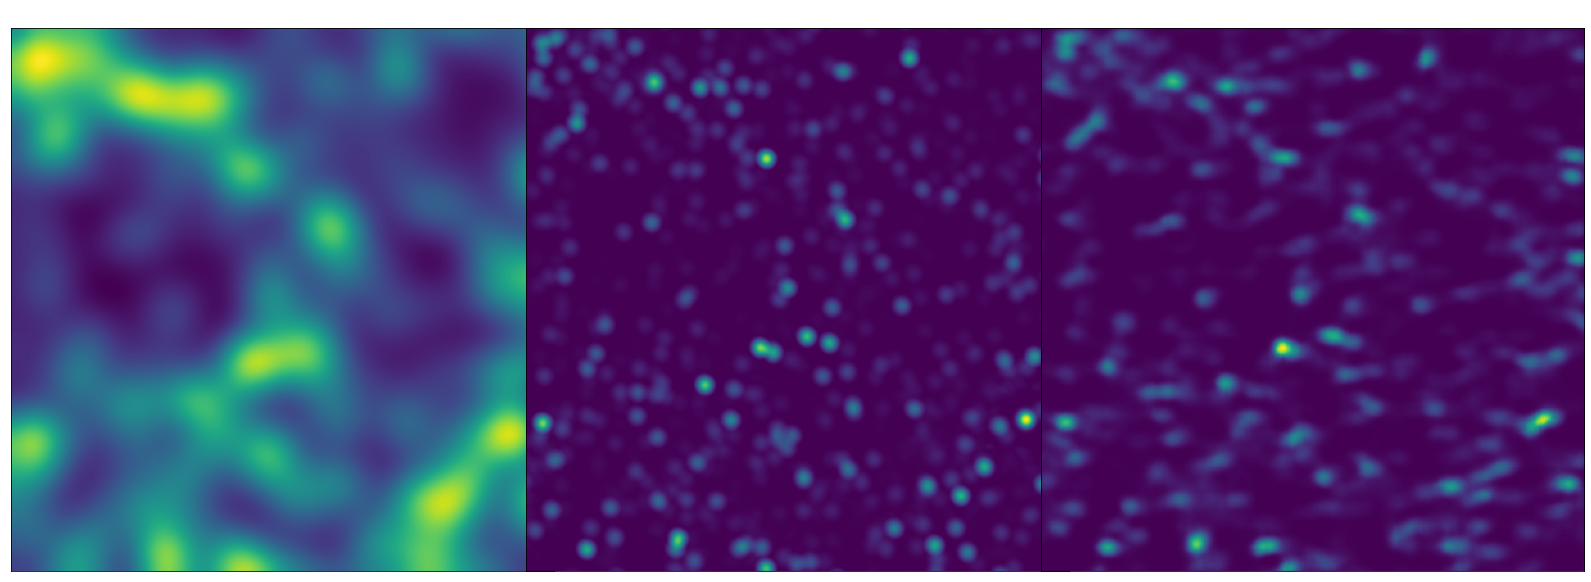

In [7]:
#im = 15
#test_gen = fits.open(path + 'gen_img/' + '2439-JCMT_450-Normal.npy.fits') #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
#test_cond_small = fits.open(path + 'cond_500/' + '2439-JCMT_450-Normal.npy.fits') #w[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
#test_img = fits.open(path + 'img/' + '2439-JCMT_450-Normal.npy.fits') #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
#test_cond = fits.open(path + 'cond_350/' + '2439-JCMT_450-Normal.npy.fits') #h[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')
#test_cond_large = fits.open(path + 'cond_250/' + '2439-JCMT_450-Normal.npy.fits') #w[im] + '.fits') #'IMG2016301URs089.fits') #path + 'gen_img/' + w[0] + '.fits')

plt.figure(figsize=(30,10)) #, set_facecolor('white'))

plt.subplot(1,3,1)
plt.imshow(test_cond_small)
plt.xticks([])
plt.yticks([])
plt.title('Original Image', fontsize=20, color='white')

plt.subplot(1,3,2)
plt.imshow(test_img)
plt.xticks([])
plt.yticks([])
plt.title('Target Image', fontsize=20, color='white')

plt.subplot(1,3,3)
plt.imshow(test_gen)
plt.xticks([])
plt.yticks([])
plt.title('Deconvolved Image', fontsize=20, color='white')

#plt.legend()

plt.subplots_adjust(wspace=-0.2, hspace=0)

plt.savefig('Herschel-JCMT_image-' + str(im) + '_Lynge.png')
plt.show()
#plt.imshow(np.concatenate((test_gen[0].data, test_img[0].data, test_cond[0].data), axis=1))
#plt.vlines(424, 0, 424, colors='b')
#plt.vlines(848, 0, 424, colors='b')
#ax = plt.gca()
#plt.xticks(np.arange(3), ['Generated Image', 'Target Image', 'Original Image'])
#ax.yaxis.set_ticks([])
#plt.xlabel('Generated Image                                                                  Target Image                                                                           Original Image', , fontsize=20)
#plt.legend()
#plt.show()

In [8]:
path = '/STEM/data/project/users/lrbl2/GalaxyGAN/Herschel-JCMT/Herschel-JCMT/interp_combined_real/'

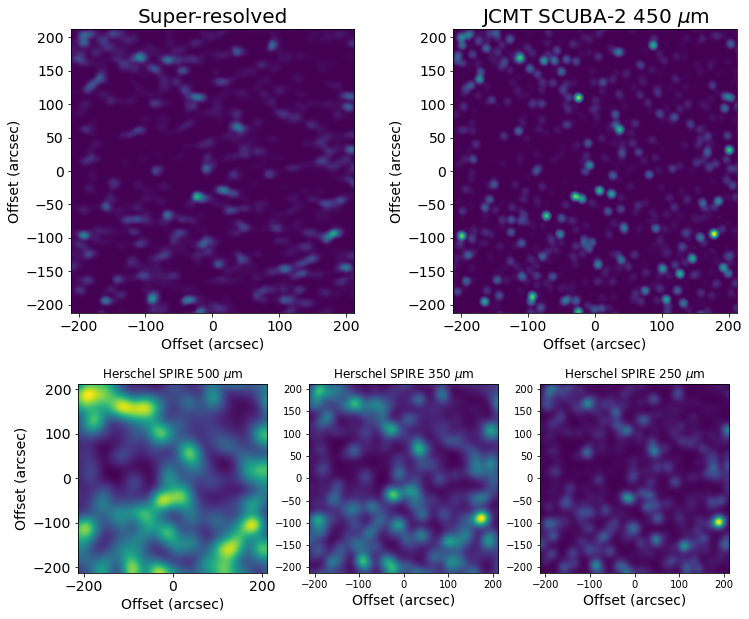

In [9]:
width = [1]
height = [1.5 , 1]

fig = plt.figure(figsize=(20,10)) #, constrained_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=width, height_ratios=height, hspace=0.3, wspace=0.5, figure=fig)
gsTop = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs[0])

TopLeft = fig.add_subplot(gsTop[0, 1:3], aspect=1)# , projection=wcs.WCS(header_JCMT).celestial)
plt.imshow(test_gen, vmin=np.min(test_img), vmax=np.max(test_img), extent=[-test_gen.shape[0]//2,test_gen.shape[0]//2, -test_gen.shape[1]//2 , test_gen.shape[1]//2])
plt.title('Super-resolved', fontsize=20)
plt.xlabel("Offset (arcsec)", fontsize=14)
plt.ylabel("Offset (arcsec)", fontsize=14)
#plt.colorbar()
#TopLeft.set_xlabel('RA (deg)', fontsize='x-large')
#TopLeft.set_ylabel('Dec (deg)', fontsize='x-large')

#lon = TopLeft.coords[0]
#lat = TopLeft.coords[1]

#lon.set_major_formatter('d.dd')
#lat.set_major_formatter('d.dd')

#lon.set_ticklabel(exclude_overlapping=True)
#lat.set_ticklabel(exclude_overlapping=True)



plt.tick_params(axis='both', labelsize=14)

TopRight = fig.add_subplot(gsTop[0, 3:5], aspect=1)# , projection=wcs.WCS(header_JCMT).celestial)
plt.imshow(test_img, vmin=np.min(test_img), vmax=np.max(test_img), extent=[-test_img.shape[0]//2,test_img.shape[0]//2, -test_img.shape[1]//2 , test_img.shape[1]//2])
plt.title('JCMT SCUBA-2 450 $\mu$m', fontsize=20)
plt.xlabel("Offset (arcsec)", fontsize=14)
plt.ylabel("Offset (arcsec)", fontsize=14)
#plt.colorbar()
#TopRight.set_xlabel('RA (deg)', fontsize='x-large')
#TopRight.set_ylabel('Dec (deg)', fontsize='x-large')

#lon = TopRight.coords[0]
#lat = TopRight.coords[1]

#lon.set_major_formatter('d.dd')
#lat.set_major_formatter('d.dd')

#lon.set_ticklabel(exclude_overlapping=True)
#lat.set_ticklabel(exclude_overlapping=True)

plt.tick_params(axis='both', labelsize=14)

gsBottom = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=5, subplot_spec=gs[1])
BottomLeft = fig.add_subplot(gsBottom[0, 1:2], aspect=1)# , projection=wcs.WCS(header_JCMT).celestial)
plt.imshow(test_cond_small, extent=[-test_cond_small.shape[0]//2,test_cond_small.shape[0]//2, -test_cond_small.shape[1]//2 , test_cond_small.shape[1]//2])
plt.title('Herschel SPIRE 500 $\mu$m')
plt.xlabel("Offset (arcsec)", fontsize=14)
plt.ylabel("Offset (arcsec)", fontsize=14)
#plt.colorbar()
#BottomLeft.set_xlabel('RA (deg)', fontsize='x-large')
#BottomLeft.set_ylabel('Dec (deg)', fontsize='x-large')

#lon = BottomLeft.coords[0]
#lat = BottomLeft.coords[1]

#lon.set_major_formatter('d.dd')
#lat.set_major_formatter('d.dd')

#lon.set_ticklabel(exclude_overlapping=True)
#lat.set_ticklabel(exclude_overlapping=True)

plt.tick_params(axis='both', labelsize=14)

BottomCenter = fig.add_subplot(gsBottom[0, 2:3], aspect=1)# , projection=wcs.WCS(header_JCMT).celestial)
plt.imshow(test_cond, extent=[-test_cond.shape[0]//2,test_cond.shape[0]//2, -test_cond.shape[1]//2 , test_cond.shape[1]//2])
plt.title('Herschel SPIRE 350 $\mu$m')
plt.xlabel("Offset (arcsec)", fontsize=14)
# plt.ylabel("Offset (arcsec)", fontsize=14)
#plt.colorbar()
#BottomCenter.set_xlabel('RA (deg)', fontsize='x-large')
#BottomCenter.set_ylabel(' ', fontsize='x-large')

#lon = BottomCenter.coords[0]
#lat = BottomCenter.coords[1]

#lon.set_major_formatter('d.dd')
#lat.set_major_formatter('d.dd')

#lon.set_ticklabel(exclude_overlapping=True)
#lat.set_ticklabel(exclude_overlapping=True)

#lat.set_ticklabel_visible(False)

#plt.tick_params(axis='both', labelsize=14)

BottomRight = fig.add_subplot(gsBottom[0, 3:4], aspect=1)# , projection=wcs.WCS(header_JCMT).celestial)
plt.imshow(test_cond_large, extent=[-test_cond_large.shape[0]//2,test_cond_large.shape[0]//2, -test_cond_large.shape[1]//2 , test_cond_large.shape[1]//2])
plt.title('Herschel SPIRE 250 $\mu$m')
plt.xlabel("Offset (arcsec)", fontsize=14)
# plt.ylabel("Offset (arcsec)", fontsize=14)
#plt.colorbar()
#BottomRight.set_xlabel('RA (deg)', fontsize='x-large')
#BottomRight.set_ylabel(' ', fontsize='x-large')

#lon = BottomRight.coords[0]
#lat = BottomRight.coords[1]

#lon.set_major_formatter('d.dd')
#lat.set_major_formatter('d.dd')

#lon.set_ticklabel(exclude_overlapping=True)
#lat.set_ticklabel(exclude_overlapping=True)

#lat.set_ticklabel_visible(False)

plt.savefig('fake_test_jan_29.pdf')

In [275]:
conv_factor = 360816.78*0.150535871090841/1e3

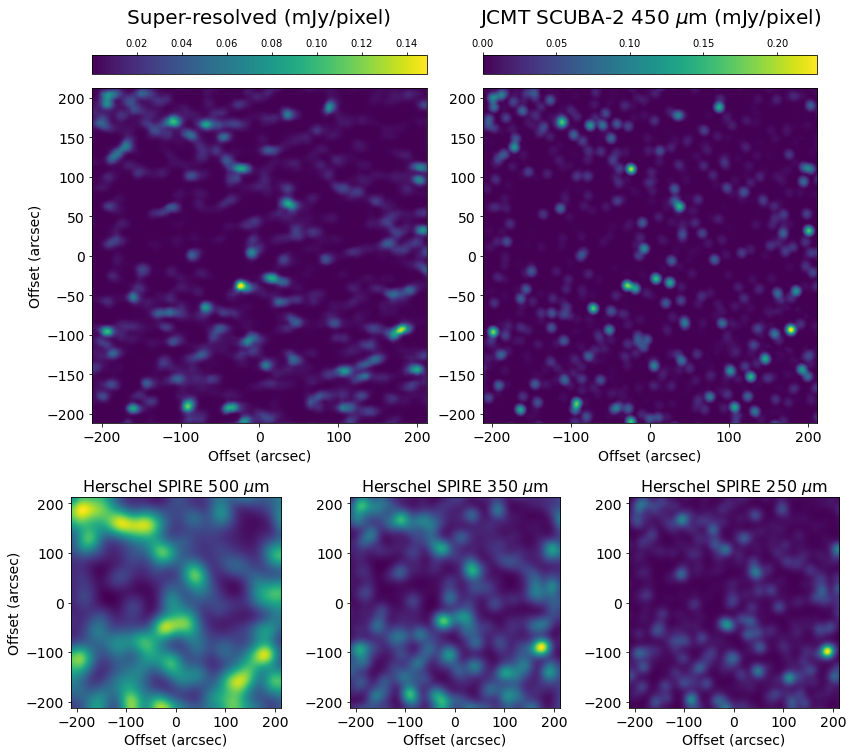

In [280]:
fig = mplplot.figure(figsize=(20, 12))
gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, height_ratios=[1, 0.55])
gsTop = gridspec.GridSpecFromSubplotSpec(
    nrows=2, ncols=6, subplot_spec=gs[0], hspace=0, wspace=0.4, height_ratios=[0.05, 1]
)
topLeftCbar = fig.add_subplot(gsTop[0, 1:3])
topRightCbar = fig.add_subplot(gsTop[0, 3:5])
topLeft = fig.add_subplot(gsTop[1, 1:3], aspect=1) #, projection=wcs.WCS(header_JCMT).celestial)
plt.tick_params(axis='both', labelsize=14)
topRight = fig.add_subplot(gsTop[1, 3:5], aspect=1) #, projection=wcs.WCS(header_JCMT).celestial)
plt.tick_params(axis='both', labelsize=14)
topLeft.set_xlabel("Offset (arcsec)", fontsize=14)
topLeft.set_ylabel("Offset (arcsec)", fontsize=14)
topRight.set_xlabel("Offset (arcsec)", fontsize=14)
topRight.set_ylabel(' ', fontsize=14)
tlMappable = topLeft.imshow(test_gen*conv_factor, extent=[-test_gen.shape[0]//2,test_gen.shape[0]//2, -test_gen.shape[1]//2 , test_gen.shape[1]//2])
trMappable = topRight.imshow(test_img*conv_factor, extent=[-test_img.shape[0]//2,test_img.shape[0]//2, -test_img.shape[1]//2 , test_img.shape[1]//2])
tlCbar = Colorbar(
    ax=topLeftCbar, mappable=tlMappable, orientation="horizontal", ticklocation="top"
)
trCbar = Colorbar(
    ax=topRightCbar, mappable=trMappable, orientation="horizontal", ticklocation="top"
)
tlCbar.set_label("Super-resolved (mJy/pixel)", fontsize=20, labelpad=15)
trCbar.set_label("JCMT SCUBA-2 450 $\mu$m (mJy/pixel)", fontsize=20, labelpad=15)
gsBottom = gridspec.GridSpecFromSubplotSpec(
    nrows=1, ncols=8, subplot_spec=gs[1], wspace=0
)
bottomLeft = fig.add_subplot(gsBottom[1:3], aspect=1) #, projection=wcs.WCS(header_JCMT).celestial)
plt.tick_params(axis='both', labelsize=14)
bottomLeft.set_xlabel("Offset (arcsec)", fontsize=14)
bottomLeft.set_ylabel("Offset (arcsec)", fontsize=14)
bottomCentre = fig.add_subplot(gsBottom[3:5], aspect=1) #, projection=wcs.WCS(header_JCMT).celestial)
plt.tick_params(axis='both', labelsize=14)
bottomCentre.set_xlabel("Offset (arcsec)", fontsize=14)
bottomCentre.set_ylabel(' ', fontsize=14)
bottomRight = fig.add_subplot(gsBottom[5:7], aspect=1) #, projection=wcs.WCS(header_JCMT).celestial)
plt.tick_params(axis='both', labelsize=14)
bottomRight.set_xlabel("Offset (arcsec)", fontsize=14)
bottomRight.set_ylabel(' ', fontsize=14)
bottomLeft.imshow(test_cond_small*conv_factor, extent=[-test_cond_large.shape[0]//2,test_cond_large.shape[0]//2, -test_cond_large.shape[1]//2 , test_cond_large.shape[1]//2])
bottomCentre.imshow(test_cond*conv_factor, extent=[-test_cond.shape[0]//2,test_cond.shape[0]//2, -test_cond.shape[1]//2 , test_cond.shape[1]//2])
bottomRight.imshow(test_cond_large*conv_factor, extent=[-test_cond_small.shape[0]//2,test_cond_small.shape[0]//2, -test_cond_small.shape[1]//2 , test_cond_small.shape[1]//2])

bottomLeft.set_title('Herschel SPIRE 500 $\mu$m', fontsize=16)
bottomCentre.set_title('Herschel SPIRE 350 $\mu$m', fontsize=16)
bottomRight.set_title('Herschel SPIRE 250 $\mu$m', fontsize=16)

plt.savefig('fake_test_feb_2.pdf', bbox_inches='tight')

In [10]:
sex_gen = gal_flux(test_gen[0].data, 10, 4, 4)
#sex_cond = gal_flux(test_cond[0].data, 10, 2, 2)
sex_img = gal_flux(test_img[0].data, 10, 4, 4)

RuntimeError: filter weights array has incorrect shape.

In [11]:
#print (len(sex_gen['flux']), len(sex_cond['flux']), len(sex_img['flux']))
print (sex_img[0]['flux'])

NameError: name 'sex_img' is not defined

In [12]:
positions = np.transpose((sex_img['xcentroid'], sex_img['ycentroid']))
apertures = pu.CircularAperture(positions, r=3.)
#norm = ImageNormalize(stretch=SqrtStretch())
plt.figure(figsize=(10,10))
plt.imshow(test_gen[0].data) #, cmap='Greys', origin='lower') #, norm=norm)
apertures.plot(color='red', lw=1) #, alpha=1.3)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(test_img[0].data) #, cmap='Greys', origin='lower') #, norm=norm)
apertures.plot(color='red', lw=1) #, alpha=1.3)
plt.show()

apertures = pu.CircularAperture(positions, r=6.)
plt.figure(figsize=(10,10))
plt.imshow(test_cond[0].data) #, cmap='Greys', origin='lower') #, norm=norm)
apertures.plot(color='red', lw=1) #, alpha=1.3)
plt.show()

NameError: name 'sex_img' is not defined

In [13]:
def gal_flux(data, gal_fwhm, gal_threshold, gal_sigma):
    mean, median, std = apstats.sigma_clipped_stats(data, sigma=gal_sigma)
    daofind = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std)
    sources = daofind(data - median)
    return sources, median, mean

def comp_flux(gen, target):
    flux_list_target, median_target, mean_target = gal_flux(target, gal_fwhm, gal_threshold, gal_sigma)
    flux_list_gen, median_gen, mean_gen = gal_flux(gen, gal_fwhm, gal_threshold, gal_sigma)
    
    positions = np.transpose((flux_list_target['xcentroid'], flux_list_target['ycentroid']))
    apertures = pu.CircularAperture(positions, r=gal_fwhm)
    
    target_table = pu.aperture_photometry(target, apertures)
    target_table['aperture_sum'].info.format = '%.8g'
    
    gen_table = pu.aperture_photometry(gen, apertures)
    gen_table['aperture_sum'].info.format = '%.8g'
    
    #print (gen_table['aperture_sum'], target_table['aperture_sum'])
    diff = np.sum(np.abs(target_table['aperture_sum'] - gen_table['aperture_sum']))/len(target_table['aperture_sum'])
    
    return diff, np.abs(median_target - median_gen), np.abs(mean_target - mean_gen)

In [14]:
comp_flux(test_gen[0].data, test_img[0].data)

RuntimeError: filter weights array has incorrect shape.

In [15]:
def comp_flux(gen, target):
    mean_target, median_target, std_target = apstats.sigma_clipped_stats(target, sigma=gal_sigma)
    daofind_target = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_target)
    sources_target = daofind_target(target - median_target)
    
    mean_gen, median_gen, std_gen = apstats.sigma_clipped_stats(gen, sigma=gal_sigma)
    daofind_gen = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_gen)
    sources_gen = daofind_gen(gen - median_gen)
    
    #flux_list_target, median_target, mean_target = gal_flux(target, gal_fwhm, gal_threshold, gal_sigma)
    #flux_list_gen, median_gen, mean_gen = gal_flux(gen, gal_fwhm, gal_threshold, gal_sigma)
    
    flux_list_target = sources_target
    flux_list_gen = sources_gen
    
    mean_target_sig, median_target_sig, std_target_sig = apstats.sigma_clipped_stats(target, sigma=5)
    daofind_target_sig = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=5*std_target_sig)
    sources_target_sig = daofind_target_sig(target - median_target_sig)
    
    flux_list_target_sig = sources_target_sig
    
    print (len(flux_list_target_sig), len(flux_list_target))
    
    positions = np.transpose((flux_list_target['xcentroid'], flux_list_target['ycentroid']))
    apertures = pu.CircularAperture(positions, r=gal_fwhm)
    
    target_table = pu.aperture_photometry(target, apertures)
    target_table['aperture_sum'].info.format = '%.8g'
    
    gen_table = pu.aperture_photometry(gen, apertures)
    gen_table['aperture_sum'].info.format = '%.8g'
    
    positions_sig = np.transpose((flux_list_target_sig['xcentroid'], flux_list_target_sig['ycentroid']))
    apertures_sig = pu.CircularAperture(positions_sig, r=gal_fwhm)
    
    target_table_sig = pu.aperture_photometry(target, apertures_sig)
    target_table_sig['aperture_sum'].info.format = '%.8g'
    
    gen_table_sig = pu.aperture_photometry(gen, apertures_sig)
    gen_table_sig['aperture_sum'].info.format = '%.8g'
    
    plt.figure(figsize=(10,10))
    plt.scatter(target_table['aperture_sum'], gen_table['aperture_sum'], label='< 5 $\sigma$')
    plt.scatter(target_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='< 5 $\sigma$')
    plt.xlabel('Target Aperture Flux', fontsize=20)
    plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
    plt.legend(fontsize=14)
    plt.savefig('comp_flux_Lynge.png')
    plt.show()
    
    #print (gen_table['aperture_sum'], target_table['aperture_sum'])
    diff = np.sum(np.abs(target_table['aperture_sum'] - gen_table['aperture_sum']))/len(target_table['aperture_sum'])
    
    return diff, np.abs(median_target - median_gen), np.abs(mean_target - mean_gen)

In [16]:
%%timeit -r 1 -n 1
comp_flux(test_gen[0].data, test_img[0].data)

RuntimeError: filter weights array has incorrect shape.

In [282]:
def comp_flux_list(gen, target):
    time_start = time.time()
    mean_target, median_target, std_target = apstats.sigma_clipped_stats(target, sigma=gal_sigma) #gal_sigma)
    daofind_target = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_target) #gal_threshold*std_target)
    sources_target = daofind_target(target - median_target)
    
    mean_gen, median_gen, std_gen = apstats.sigma_clipped_stats(gen, sigma=gal_sigma) #gal_sigma)
    daofind_gen = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_gen) #gal_threshold*std_gen)
    sources_gen = daofind_gen(gen - median_gen)
    
    #flux_list_target, median_target, mean_target = gal_flux(target, gal_fwhm, gal_threshold, gal_sigma)
    #flux_list_gen, median_gen, mean_gen = gal_flux(gen, gal_fwhm, gal_threshold, gal_sigma)
    
    flux_list_target = sources_target
    flux_list_gen = sources_gen
    
    fitsFile = "/STEM/data/project/users/lrbl2/images_real/normal/9-6-jcmt_450_image.fits"
    with fits.open(fitsFile) as fitsHDU:
        fitsWcs = wcs.WCS(fitsHDU[0].header)
    
    #mean_target_sig, median_target_sig, std_target_sig = apstats.sigma_clipped_stats(target, sigma=5)
    #daofind_target_sig = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=5*std_target_sig)
    #sources_target_sig = daofind_target_sig(target - median_target_sig)
    
    #flux_list_target_sig = sources_target_sig
    
    #print (len(flux_list_target_sig), len(flux_list_target))
    
    coords_gen = coordinates.SkyCoord.from_pixel(sources_gen["xcentroid"], sources_gen["ycentroid"], wcs = fitsWcs)
    coords_img = coordinates.SkyCoord.from_pixel(sources_target["xcentroid"], sources_target["ycentroid"], wcs = fitsWcs)
    
    all_coords_gen.append(coords_gen)
    all_coords_img.append(coords_img)
    
    matches = coords_gen.match_to_catalog_sky(coords_img)
    #all_matches.append(matches)
    positions_image = np.transpose((sources_target['xcentroid'][matches[0]], 
                                    sources_target['ycentroid'][matches[0]]))
    apertures_image = pu.CircularAperture(positions_image, r=gal_fwhm)
    
    positions = np.transpose((flux_list_gen['xcentroid'], flux_list_gen['ycentroid']))
    apertures = pu.CircularAperture(positions, r=gal_fwhm)
    
    target_table = pu.aperture_photometry(target, apertures_image)
    target_table['aperture_sum'].info.format = '%.8g'
    
    gen_table = pu.aperture_photometry(gen, apertures)
    gen_table['aperture_sum'].info.format = '%.8g'
    
    #positions_sig = np.transpose((flux_list_target_sig['xcentroid'], flux_list_target_sig['ycentroid']))
    #apertures_sig = pu.CircularAperture(positions_sig, r=gal_fwhm)
    
    #target_table_sig = pu.aperture_photometry(target, apertures_sig)
    #target_table_sig['aperture_sum'].info.format = '%.8g'
    
    #gen_table_sig = pu.aperture_photometry(gen, apertures_sig)
    #gen_table_sig['aperture_sum'].info.format = '%.8g'
    
    #print (time.time() - time_start)
    return target_table['aperture_sum'], gen_table['aperture_sum']

In [283]:
all_coords_gen = []
all_coords_img = []
all_matches = []

In [284]:
fitfunc = lambda x, a: a*x #+b # + params[1] 

In [285]:
regress_slope = []
regress_interrupt = []
gen_tar = []
gen_con = []
tar_con = []
rel = []

In [286]:
all_flux_gen = np.load( "all_flux_gen.npy", allow_pickle=True)
all_flux_img = np.load( "all_flux_img.npy", allow_pickle=True)
all_matches = np.load( "all_matches.npy", allow_pickle=True)

In [287]:
all_gen_list = []
all_img_list = []

In [300]:
#%%timeit -r 1 -n 1

for i in range(len(test_csv['SCUBA-2_450'])):
    #print (i)
    img_list, gen_list = comp_flux_list(np.load(path + 'gen_img-' + str(im) + '-' + test_csv['SCUBA-2_450'][i]), np.load(path + 'img-' + str(im) + '-' + test_csv['SCUBA-2_450'][i]))
    #gen_tar.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'img/' + h[i] + '.fits')[0].data))
    #gen_con.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'cond/' + w[i] + '.fits')[0].data))
    #print (scipy.optimize.curve_fit(fitfunc, img_list, gen_list))
    regress_slope.append(sc.stats.linregress(img_list/1e3, gen_list*1)[0])
    regress_interrupt.append(sc.stats.linregress(img_list/1e3, gen_list*1)[1])
    #print (regress_slope[i], gen_tar[i], gen_con[i])
    #print (regress_slope[i]/gen_con[i])
    #print (regress[i])
    print (len(img_list), len(gen_list))
    for i in range(len(img_list)):
        if img_list[i]*360816.78*0.150535871090841/1e3 > 8:
            if img_list[i]*360816.78*0.150535871090841/1e3 < 12:
                rel.append(img_list/gen_list)
    
    all_gen_list.append(gen_list)
    all_img_list.append(img_list)
    #print (img_list*1)

    #plt.scatter(img_list*360816.78/1e3, gen_list*360816.78/1e3, color='b', alpha=0.5, s=5) #, label='<5 $\sigma$')
    #plt.plot(img_list, (img_list*regress_slope[i] + regress_interrupt[i]))
    #plt.scatter(target_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='5< $\sigma$')
# print(np.concatenate(all_flux_img)*1e3, np.concatenate(all_flux_gen)*1e3, sep="\n\n")

print (np.mean(regress_slope), np.mean(regress_interrupt))
#print ('Relation = ', np.mean(rel), np.std(rel))

#print ('slope', 'intercept', 'r_value', 'r_value^2', 'p_value', 'std_err', ' = ', slope, intercept, r_value, r_value**2, p_value, std_err)


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


100 100


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


99 99


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


98 98


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


99 99


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


78 78


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


78 78


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


100 100


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


98 98


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


75 75


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


99 99


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


67 67


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


77 77


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


77 77


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


98 98


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


100 100


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


94 94


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


98 98


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


98 98


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


101 101


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


77 77


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


72 72


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


103 103


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


65 65


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


80 80


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


73 73


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


86 86


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


97 97


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


78 78


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


93 93


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


84 84


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


88 88


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


92 92


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


81 81


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


96 96


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


95 95


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


78 78


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


79 79


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


103 103


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


91 91


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


87 87


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


82 82


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


83 83


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


89 89


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


90 90


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


85 85


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


78 78
99 99
686.404112690359 0.017856800254773417


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [306]:
print ('Relation = ', np.mean(np.concatenate(rel)), np.std(np.concatenate(rel)))
#print (rel)

Relation =  1.2879434834599426 0.5750865167624376


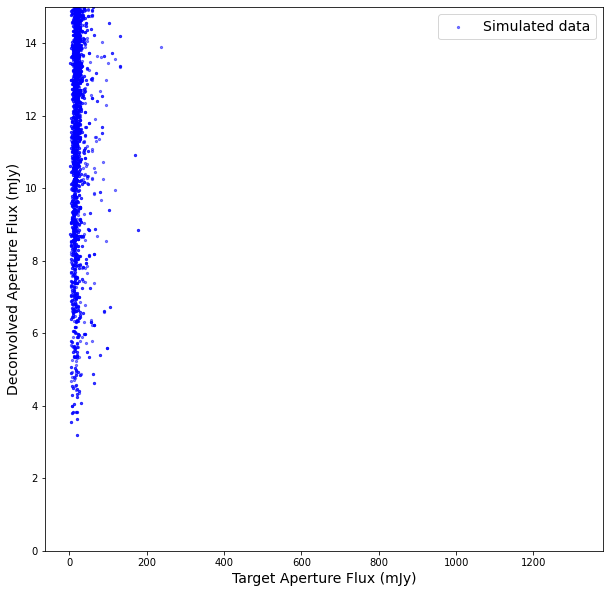

In [307]:
plt.figure(figsize=(10,10))
plt.scatter(np.concatenate(all_img_list)*360816.78/1e3*1, np.concatenate(all_gen_list)*360816.78/1e3*1, color='b', alpha=0.5, s=5, label='Simulated data')
#plt.scatter(np.concatenate(all_flux_img)*360816.78/1e3*1, np.concatenate(all_flux_gen)*360816.78/1e3*1, c="r", alpha=0.5, s=5, label='Obervational data')
#plt.plot([0,10**3], [0,10**3])
#plt.xscale('log')
#plt.yscale('log')
plt.ylim([0,15])

# plt.plot(np.logspace(-2, 3,10), 
#          np.logspace(-2, 3,10)*np.mean(regress_slope) + np.mean(regress_interrupt))
plt.xlabel('Target Aperture Flux (mJy)', fontsize=14)
plt.ylabel('Deconvolved Aperture Flux (mJy)', fontsize=14)

plt.legend(fontsize=14)
plt.savefig('comp_flux_fake_Lynge.png')
plt.show()

In [308]:
np.concatenate(all_img_list)*360816.78/1e3

array([ 65.88651971,  22.92264199, 104.00259355, ...,  67.89420029,
        27.6883224 ,  23.74324737])

In [309]:
def lin_func(x, a, b):
    return a*x + b

(18,)
[  0.39071739   2.87575856   3.56740782   4.13616544   4.64306867
   5.13234379   5.64517565   6.16921184   6.73251165   7.37112789
   8.06489599   8.92576164   9.95991485  11.30068097  13.20823031
  16.57822531 114.77572091]
17 16 16
slope intercept r_value r_value^2 p_value std_err  =  0.2612983926507045 0.4079963350673911 0.6053610958216099 0.36646205633434037 0.0 0.00461670442588028


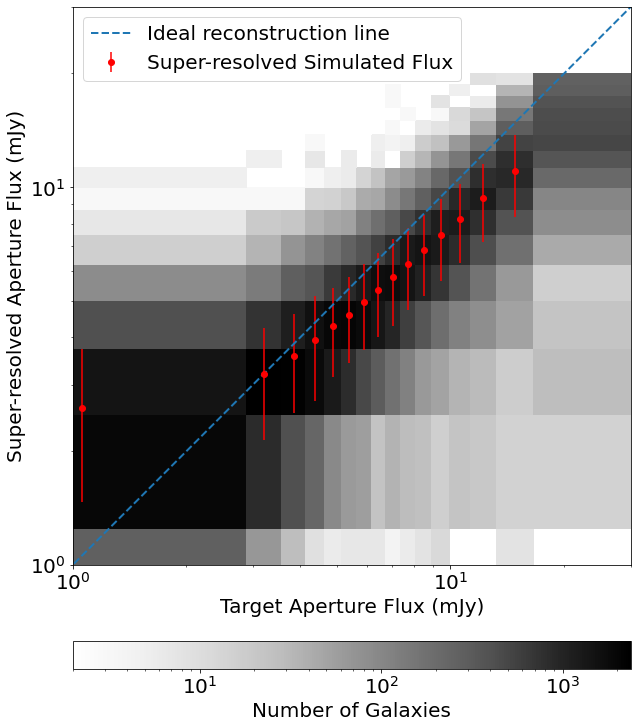

In [314]:
popt, pcov = curve_fit(lin_func, np.concatenate(all_flux_img)*360816.78/1e3*0.150535871090841, np.concatenate(all_flux_gen)*360816.78/1e3*0.150535871090841)

ax =plt.figure(figsize=(10,14)).add_subplot(1,1,1, aspect=1)
nBins = 16
p_b = np.concatenate(all_img_list).size//nBins
sorted_val = np.sort(np.concatenate(all_img_list))

#print (np.size(sorted_val))
bin_edge = np.append(np.sort(sorted_val)[::np.size(sorted_val)//(nBins)], sorted_val.max()) #np.pad(sorted_val, [165, 0]).reshape([p_b, -1])[0,:] #.T[:,0]
print (bin_edge.shape) #*360816.78/1e3*0.150535871090841)
#np.linspace(0,15, nBins+1)
results= ax.hist2d(np.concatenate(all_img_list)*360816.78/1e3*0.150535871090841, np.concatenate(all_gen_list)*360816.78/1e3*0.150535871090841, bins=[bin_edge[:-1]*360816.78/1e3*0.150535871090841, np.linspace(0,20, nBins+1)], cmap="Greys", norm=matplotlib.colors.LogNorm())
binAssignments = np.digitize(np.concatenate(all_img_list)*360816.78/1e3*0.150535871090841, results[1])
yMeans = [(np.concatenate(all_gen_list)*360816.78/1e3*0.150535871090841)[binAssignments == i].mean() for i in range(1, nBins+1)]
ySigmas = [(np.concatenate(all_gen_list)*360816.78/1e3*0.150535871090841)[binAssignments == i].std() for i in range(1, nBins+1)]
plt.xlabel('Target Aperture Flux (mJy)', fontsize=20)
plt.ylabel('Super-resolved Aperture Flux (mJy)', fontsize=20)

#plt.plot(np.linspace(0,20,10), lin_func(np.linspace(0,20,10), popt[0], popt[1]))
#plt.xlim([-1,23])
#plt.ylim([-1,23])
#ax.set_xscale("log")
#ax.set_yscale("log")
#print (len(yMeans), len(ySigmas))
print(results[1]) #, yMeans, np.sort(binAssignments))
print (np.size(results[1]), np.size(yMeans), np.size(ySigmas))
#print (results[1].shape)
ax.errorbar(10**(0.5*(np.log10(results[1][1:]) + np.log10(results[1][:-1]))), yMeans, ySigmas, c="r", ls="none", marker="o", label='Super-resolved Simulated Flux')
#ax.errorbar(0.5*(results[1][1:] + results[1][:-1]), yMeans_corr, 0, c="b", ls="none", marker="o")
#plt.plot(np.linspace(0,20,10), lin_func(np.linspace(0,20,10), popt[0], popt[1]), c='orange')
#plt.plot(np.linspace(0,20,10), lin_func(np.linspace(0,20,10), slope, intercept), c='k')
colb = plt.colorbar(results[-1], orientation='horizontal', pad=0.1)
colb.set_label('Number of Galaxies', fontsize=20)
#plt.plot(np.linspace(1,20,20),  popt[0]*np.linspace(1,20,20) + popt[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.plot(np.linspace(0,30,20), np.linspace(0,30,20), lw=2, ls='--',label='Ideal reconstruction line')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 30])
plt.ylim([1, 30])
plt.legend(fontsize=20)
colb.ax.tick_params(labelsize=20)
plt.savefig('sim_comp_flux_binned_Lynge.pdf')
# ax.errorbar(clusterX, clusterY, dClusterY,dClusterX, marker=".", ls="none")

#print (np.histogram2d(np.concatenate(all_gen_list)*360816.78/1e3, np.concatenate(all_img_list)*360816.78/1e3,bins= nBins))

slope, intercept, r_value, p_value, std_err = stats.linregress(np.concatenate(all_flux_img)*360816.78/1e3, np.concatenate(all_flux_gen)*360816.78/1e3)

print ('slope', 'intercept', 'r_value', 'r_value^2', 'p_value', 'std_err', ' = ', slope, intercept, r_value, r_value**2, p_value, std_err)

In [189]:

ori_list, img_list = comp_flux_list(np.load(path + 'img-' + str(im) + '-' + test_csv['SCUBA-2_450'][0]), np.load(('/home/stem/lrbl2/lrbl2/training_dec_2/test/j_450/' + test_csv['SCUBA-2_450'][0])))

Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


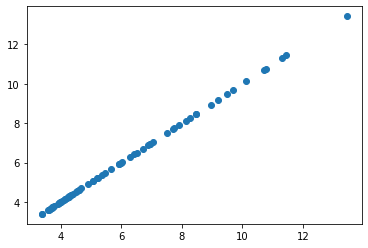

In [230]:
plt.scatter(img_list*360816.78*0.150535871090841/1e3, ori_list*0.150535871090841/1e3)

In [229]:
print (np.mean(ori_list*0.150535871090841/1e3))

6.00812428158898


In [200]:
large_fits = fits.open("/STEM/data/project/users/lrbl2/large-JCMT-450-sci.fits")

In [224]:
sex_large = gal_flux(large_fits[0].data, 10, 5, 5)

In [225]:
print (sex_large)

  id      xcentroid      ...        flux                mag         
----- ------------------ ... ------------------ --------------------
    1  5067.102264597307 ... 1.9023169274159726  -0.6982071810327138
    2  4343.710765203201 ...   1.02475339266368 -0.02654841203752592
    3 4752.0680769220335 ...  6.455502135658006   -2.024825072843759
    4  4909.162637221714 ... 1.0388707800559076 -0.04140382799126145
    5   4301.35288797173 ...  4.363435835906994  -1.5995714851808154
    6   4333.47238144861 ... 1.7662185699256348  -0.6176111165055677
    7  4182.837569643604 ...  2.134394680889993  -0.8231868248389318
    8  4234.506741656616 ... 1.7378415036891692  -0.6000254124277118
    9  4453.395772249327 ...  8.521308548532566   -2.326265727459736
   10 3734.8986340688857 ...  8.896513667688813   -2.373049625737285
  ...                ... ...                ...                  ...
24529  402.9318468374805 ... 1.5505895673598329  -0.4762421440835629
24530  513.1813445286206 ... 2.069

In [226]:
positions = np.transpose((sex_large['xcentroid'], sex_large['ycentroid']))
apertures = pu.CircularAperture(positions, r=5)
sex_large_table = pu.aperture_photometry(large_fits[0].data, apertures)
sex_large_table['aperture_sum'].info.format = '%.8g'

In [228]:
print (np.mean(sex_large_table['aperture_sum']*0.150535871090841/1e3))

3.5762345134336133


In [ ]:
def lin_func(x, a, b):
    return a*x + b

In [249]:
popt, pcov = curve_fit(lin_func, np.concatenate(all_flux_img)*360816.78/1e3*0.150535871090841, np.concatenate(all_flux_gen)*360816.78/1e3*0.150535871090841)
print (popt, pcov)

[0.26129839 0.06141808] [[ 2.13139597e-05 -2.94407910e-06]
 [-2.94407910e-06  6.41612953e-07]]


In [248]:
print (stats.linregress(np.concatenate(all_flux_img)*360816.78/1e3*0.150535871090841, np.concatenate(all_flux_gen)*360816.78/1e3*0.150535871090841))

LinregressResult(slope=0.26129839265070437, intercept=0.06141808370124035, rvalue=0.6053610958216099, pvalue=0.0, stderr=0.004616704425880278)


In [ ]:
print (np.mean(regress_slope), np.std(regress_slope))
print (np.mean(regress_interrupt), np.std(regress_interrupt))

In [ ]:
def comp_flux_list_cond(gen, target, cond):
    time_start = time.time()
    mean_cond, median_cond, std_cond = apstats.sigma_clipped_stats(cond, sigma=gal_sigma) #gal_sigma)
    daofind_cond = pu.DAOStarFinder(fwhm=gal_fwhm*2, threshold=gal_threshold*std_cond) #gal_threshold*std_cond)
    sources_cond = daofind_cond(cond - median_cond)
    
    mean_gen, median_gen, std_gen = apstats.sigma_clipped_stats(gen, sigma=gal_sigma) #gal_sigma)
    daofind_gen = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_gen) #gal_threshold*std_gen)
    sources_gen = daofind_gen(gen - median_gen)
    
    mean_target, median_target, std_target = apstats.sigma_clipped_stats(target, sigma=gal_sigma) #gal_sigma)
    daofind_target = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_target) #gal_threshold*std_gen)
    sources_target = daofind_target(target - median_target)
    
    #flux_list_cond, median_cond, mean_cond = gal_flux(cond, gal_fwhm, gal_threshold, gal_sigma)
    #flux_list_gen, median_gen, mean_gen = gal_flux(gen, gal_fwhm, gal_threshold, gal_sigma)
    
    flux_list_cond = sources_cond
    flux_list_gen = sources_gen
    flux_list_target = sources_target
    
    #mean_cond_sig, median_cond_sig, std_cond_sig = apstats.sigma_clipped_stats(cond, sigma=5)
    #daofind_cond_sig = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=5*std_cond_sig)
    #sources_cond_sig = daofind_cond_sig(cond - median_cond_sig)
    
    #flux_list_cond_sig = sources_cond_sig
    
    #print (len(flux_list_cond_sig), len(flux_list_cond))
    
    positions = np.transpose((flux_list_gen['xcentroid'], flux_list_gen['ycentroid']))
    apertures = pu.CircularAperture(positions, r=gal_fwhm)
    apertures_cond = pu.CircularAperture(positions, r=gal_fwhm*2)
    
    cond_table = pu.aperture_photometry(cond, apertures_cond)
    cond_table['aperture_sum'].info.format = '%.8g'
    
    gen_table = pu.aperture_photometry(gen, apertures)
    gen_table['aperture_sum'].info.format = '%.8g'
    
    target_table = pu.aperture_photometry(target, apertures)
    target_table['aperture_sum'].info.format = '%.8g'
    
    #positions_sig = np.transpose((flux_list_cond_sig['xcentroid'], flux_list_cond_sig['ycentroid']))
    #apertures_sig = pu.CircularAperture(positions_sig, r=gal_fwhm)
    
    #cond_table_sig = pu.aperture_photometry(cond, apertures_sig)
    #cond_table_sig['aperture_sum'].info.format = '%.8g'
    
    #gen_table_sig = pu.aperture_photometry(gen, apertures_sig)
    #gen_table_sig['aperture_sum'].info.format = '%.8g'
    
    #print (time.time() - time_start)
    return cond_table['aperture_sum'], gen_table['aperture_sum'], target_table['aperture_sum'], mean_gen/mean_cond

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
plt.figure(figsize=(10,10))
for i in range(100):
    #print (i)
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data,)
    #gen_tar.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'img/' + h[i] + '.fits')[0].data))
    #gen_con.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'cond/' + w[i] + '.fits')[0].data))
    #print (scipy.optimize.curve_fit(fitfunc, img_list, gen_list))
    regress_slope_gen.append(sc.stats.linregress(cond_list, gen_list)[0])
    regress_interrupt_gen.append(sc.stats.linregress(cond_list, gen_list)[1])
    #print (regress_slope_gen[i], gen_cond_mean)
    #regress_slope_target.append(sc.stats.linregress(img_list, gen_list)[0])
    #regress_interrupt_target.append(sc.stats.linregress(img_list, gen_list)[1])
    #print (regress_slope[i], gen_tar[i], gen_con[i])
    #print (regress_slope[i]/gen_con[i])
    #print (regress[i])
    plt.scatter(cond_list, gen_list) #, label='<5 $\sigma$')
    #plt.plot(img_list, (img_list*regress_slope[i] + regress_interrupt[i]))
    #plt.scatter(cond_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='5< $\sigma$')
plt.xlabel('Original Aperture Flux', fontsize=20)
plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('comp_flux_Lynge.png')
plt.show()

print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
i1 = 0
plt.figure(figsize=(10,10))
for i in range(len(w)):
    #print (i)
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data)
    if np.max(gen_list)/np.max(cond_list) < 1.5:
        popt, pcov = scipy.optimize.curve_fit(fitfunc, target_list, gen_list)
        regress_slope_gen.append(popt[0]) #sc.stats.linregress(target_list, gen_list)[0])
        #regress_interrupt_gen.append(sc.stats.linregress(target_list, gen_list)[1])
        plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
        i1 += 1
    #plt.plot(img_list, (img_list*regress_slope[i] + regress_interrupt[i]))
    #plt.scatter(cond_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='5< $\sigma$')
plt.plot([0,8], [0,8])
plt.xlabel('Target Aperture Flux', fontsize=20)
plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('comp_flux_Lynge.png')
plt.show()

#plt.figure(figsize=(10,10))
#for j in range(len(w)):
#    #print (i)
#    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[j] + '.fits')[0].data, fits.open(path + 'img/' + h[j] + '.fits')[0].data, 
#                                             fits.open(path + 'cond/' + w[j] + '.fits')[0].data)
#    if 0.8 < np.max(gen_list)/np.max(cond_list) < 1:
#        plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
#plt.xlim([0,82000])
#plt.ylim([0,82000])
#plt.xlabel('Target Aperture Flux', fontsize=20)
#plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
#plt.legend(fontsize=14)
#plt.savefig('comp_flux_Lynge.png')
#plt.show()



print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
#print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
i1 = 0
plt.figure(figsize=(10,10))
for i in range(len(w)):
    #print (i)
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data,)
    #gen_tar.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'img/' + h[i] + '.fits')[0].data))
    #gen_con.append(np.mean(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)/np.mean(fits.open(path + 'cond/' + w[i] + '.fits')[0].data))
    #print (scipy.optimize.curve_fit(fitfunc, img_list, gen_list))
    #if np.max(gen_list)/np.max(cond_list) < 100:
    regress_slope_gen.append(sc.stats.linregress(target_list, gen_list)[0])
    regress_interrupt_gen.append(sc.stats.linregress(target_list, gen_list)[1])
    #print (regress_slope_gen[i1], gen_cond_mean)
    #regress_slope_target.append(sc.stats.linregress(img_list, gen_list)[0])
    #regress_interrupt_target.append(sc.stats.linregress(img_list, gen_list)[1])
    #print (regress_slope[i], gen_tar[i], gen_con[i])
    #print (regress_slope[i]/gen_con[i])
    #print (regress[i])
    #if regress_slope_gen[i] > 0.9:
    plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
    i1 += 1
    #plt.plot(img_list, (img_list*regress_slope[i] + regress_interrupt[i]))
    #plt.scatter(cond_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='5< $\sigma$')
plt.xlabel('Target Aperture Flux', fontsize=20)
plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.savefig('comp_flux_Lynge.png')
plt.show()

print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
im_num = 20
i1 = 0
im1, im2, im3 = 1, 2, 3
plt.figure(figsize=(15,5*im_num))
for i in range(im_num):
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data,)
    plt.subplot(im_num, 3, im1)
    plt.imshow(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)
    
    plt.subplot(im_num, 3, im2)
    plt.imshow(fits.open(path + 'img/' + h[i] + '.fits')[0].data)
    plt.title(w[i] + '.fits')
    
    plt.subplot(im_num, 3, im3)
    regress_slope_gen.append(sc.stats.linregress(target_list, gen_list)[0])
    regress_interrupt_gen.append(sc.stats.linregress(target_list, gen_list)[1])
    plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
    plt.plot([0, 0.8], [0, 0.8])
    i1 += 1
    im1 += 3
    im2 += 3
    im3 += 3
#plt.xlabel('Target Aperture Flux', fontsize=20)
#plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend(fontsize=14)
#plt.savefig('comp_flux_Lynge.png')
#plt.show()

print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
def comp_flux_list_cond(gen, target, cond):
    time_start = time.time()
    mean_cond, median_cond, std_cond = apstats.sigma_clipped_stats(cond, sigma=gal_sigma) #gal_sigma)
    daofind_cond = pu.DAOStarFinder(fwhm=gal_fwhm*2, threshold=gal_threshold*std_cond) #gal_threshold*std_cond)
    sources_cond = daofind_cond(cond - median_cond)
    
    mean_gen, median_gen, std_gen = apstats.sigma_clipped_stats(gen, sigma=gal_sigma) #gal_sigma)
    daofind_gen = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_gen) #gal_threshold*std_gen)
    sources_gen = daofind_gen(gen - median_gen)
    
    mean_target, median_target, std_target = apstats.sigma_clipped_stats(target, sigma=gal_sigma) #gal_sigma)
    daofind_target = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=gal_threshold*std_target) #gal_threshold*std_gen)
    sources_target = daofind_target(target - median_target)
    
    #flux_list_cond, median_cond, mean_cond = gal_flux(cond, gal_fwhm, gal_threshold, gal_sigma)
    #flux_list_gen, median_gen, mean_gen = gal_flux(gen, gal_fwhm, gal_threshold, gal_sigma)
    
    flux_list_cond = sources_cond
    flux_list_gen = sources_gen
    flux_list_target = sources_target
    
    #mean_cond_sig, median_cond_sig, std_cond_sig = apstats.sigma_clipped_stats(cond, sigma=5)
    #daofind_cond_sig = pu.DAOStarFinder(fwhm=gal_fwhm, threshold=5*std_cond_sig)
    #sources_cond_sig = daofind_cond_sig(cond - median_cond_sig)
    
    #flux_list_cond_sig = sources_cond_sig
    
    #print (len(flux_list_cond_sig), len(flux_list_cond))
    
    positions = np.transpose((flux_list_gen['xcentroid'], flux_list_gen['ycentroid']))
    apertures = pu.CircularAperture(positions, r=gal_fwhm)
    apertures_cond = pu.CircularAperture(positions, r=gal_fwhm*2)
    
    cond_table = pu.aperture_photometry(cond, apertures_cond)
    cond_table['aperture_sum'].info.format = '%.8g'
    
    gen_table = pu.aperture_photometry(gen, apertures)
    gen_table['aperture_sum'].info.format = '%.8g'
    
    target_table = pu.aperture_photometry(target, apertures)
    target_table['aperture_sum'].info.format = '%.8g'
    
    max_aper = (-np.array(gen_table['aperture_sum'])).argsort()[:15]
    
    #print (max_aper[3], pu.aperture_photometry(gen, apertures[max_aper[3]]))
    
    normalisation = (pu.aperture_photometry(gen, apertures[max_aper[0]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[0]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[1]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[1]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[2]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[2]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[3]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[3]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[4]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[4]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[5]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[5]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[6]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[6]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[7]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[7]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[8]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[8]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[9]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[9]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[10]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[10]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[11]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[11]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[12]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[12]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[13]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[13]])['aperture_sum'] + \
                            pu.aperture_photometry(gen, apertures[max_aper[14]])['aperture_sum']/pu.aperture_photometry(cond, apertures_cond[max_aper[14]])['aperture_sum'])/15
    
    #positions_sig = np.transpose((flux_list_cond_sig['xcentroid'], flux_list_cond_sig['ycentroid']))
    #apertures_sig = pu.CircularAperture(positions_sig, r=gal_fwhm)
    
    #cond_table_sig = pu.aperture_photometry(cond, apertures_sig)
    #cond_table_sig['aperture_sum'].info.format = '%.8g'
    
    #gen_table_sig = pu.aperture_photometry(gen, apertures_sig)
    #gen_table_sig['aperture_sum'].info.format = '%.8g'
    
    #print (time.time() - time_start)
    return cond_table['aperture_sum'], gen_table['aperture_sum'], target_table['aperture_sum'], mean_gen/mean_cond

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
im_num = 10
i1 = 0
im1, im2, im3 = 1, 2, 3
plt.figure(figsize=(15,5*im_num))
for i in range(im_num):
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data,)
    plt.subplot(im_num, 3, im1)
    plt.imshow(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data)
    
    plt.subplot(im_num, 3, im2)
    plt.imshow(fits.open(path + 'img/' + h[i] + '.fits')[0].data)
    plt.title(w[i] + '.fits')
    
    plt.subplot(im_num, 3, im3)
    regress_slope_gen.append(sc.stats.linregress(target_list, gen_list)[0])
    regress_interrupt_gen.append(sc.stats.linregress(target_list, gen_list)[1])
    plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
    plt.plot([0, 8], [0, 8])
    i1 += 1
    im1 += 3
    im2 += 3
    im3 += 3
#plt.xlabel('Target Aperture Flux', fontsize=20)
#plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend(fontsize=14)
#plt.savefig('comp_flux_Lynge.png')
#plt.show()

print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
regress_slope_gen = []
regress_interrupt_gen = []

In [ ]:
%%timeit -r 1 -n 1
i1 = 0
plt.figure(figsize=(10,10))
for i in range(len(w)):
    #print (i)
    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[i] + '.fits')[0].data, fits.open(path + 'img/' + h[i] + '.fits')[0].data, 
                                             fits.open(path + 'cond_500/' + w[i] + '.fits')[0].data)
    if np.max(gen_list)/np.max(cond_list) < 1.5:
        popt, pcov = scipy.optimize.curve_fit(fitfunc, target_list, gen_list)
        regress_slope_gen.append(popt[0]) #sc.stats.linregress(target_list, gen_list)[0])
        #regress_interrupt_gen.append(sc.stats.linregress(target_list, gen_list)[1])
        plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
        i1 += 1
    #plt.plot(img_list, (img_list*regress_slope[i] + regress_interrupt[i]))
    #plt.scatter(cond_table_sig['aperture_sum'], gen_table_sig['aperture_sum'], label='5< $\sigma$')
plt.plot([0,8], [0,8])
plt.xlabel('Target Aperture Flux', fontsize=20)
plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('comp_flux_Lynge.png')
plt.show()

#plt.figure(figsize=(10,10))
#for j in range(len(w)):
#    #print (i)
#    cond_list, gen_list, target_list, gen_cond_mean = comp_flux_list_cond(fits.open(path + 'gen_img/' + h[j] + '.fits')[0].data, fits.open(path + 'img/' + h[j] + '.fits')[0].data, 
#                                             fits.open(path + 'cond/' + w[j] + '.fits')[0].data)
#    if 0.8 < np.max(gen_list)/np.max(cond_list) < 1:
#        plt.scatter(target_list, gen_list) #, label='<5 $\sigma$')
#plt.xlim([0,82000])
#plt.ylim([0,82000])
#plt.xlabel('Target Aperture Flux', fontsize=20)
#plt.ylabel('Deconvolved Aperture Flux', fontsize=20)
#plt.legend(fontsize=14)
#plt.savefig('comp_flux_Lynge.png')
#plt.show()



print (np.mean(regress_slope_gen), np.std(regress_slope_gen))
#print (np.mean(regress_interrupt_gen), np.std(regress_interrupt_gen))

In [ ]:
(-a).argsort()[:5]